سوال 1:  
سیگنال

x(t) = cos(2πt) * rect(t/2)

 را تعریف کن.  

1. انرژی سیگنال را محاسبه کنید  
2. بررسی کنید آیا این سیگنال توان‌دار است یا انرژی‌دار؟


Energy: 1.0010 → Energy Signal


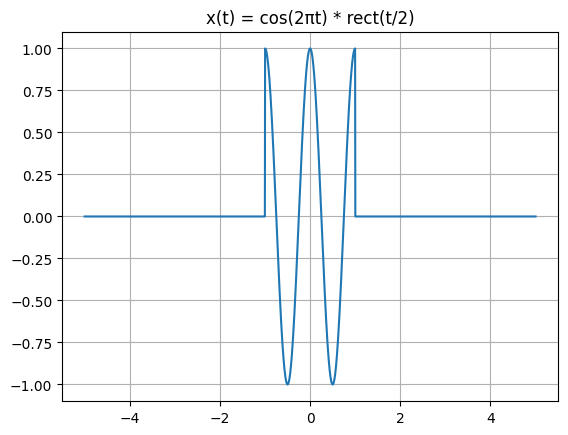

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

t = np.linspace(-5, 5, 2000)
x = np.cos(2*np.pi*t) * (np.abs(t) <= 1)

energy = simpson(x**2, t)
print(f"Energy: {energy:.4f} → Energy Signal")

plt.plot(t, x)
plt.title("x(t) = cos(2πt) * rect(t/2)")
plt.grid(True)
plt.show()


سوال 2:  
یک سیگنال مربعی با دوره 2 و دامنه 1 را تعریف کنید  
با استفاده از FFT

  طیف آن را رسم کنید و مؤلفه‌های اصلی را مشخص کنید


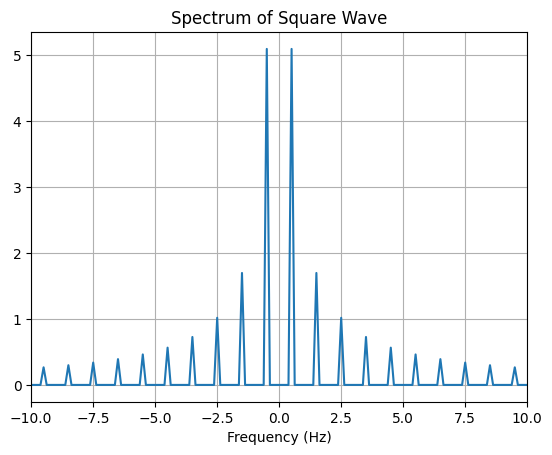

In [2]:
T = 2
Fs = 1000
t = np.linspace(0, 4*T, 4*T*Fs)
x = np.sign(np.sin(2*np.pi*t / T))

from scipy.fft import fft, fftfreq, fftshift
f = fftshift(fftfreq(len(t), 1/Fs))
X = fftshift(fft(x)) * (1/Fs)

plt.plot(f, np.abs(X))
plt.title("Spectrum of Square Wave")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.xlim(-10, 10)
plt.show()


سوال 3:  
دو سیگنال تعریف کنید  
الف) x₁(t) = exp(j2πt)  
ب) x₂(t) = cos(2πt)  
طیف هر دو را رسم کنید و تفاوت تقارن طیف را تحلیل کنید


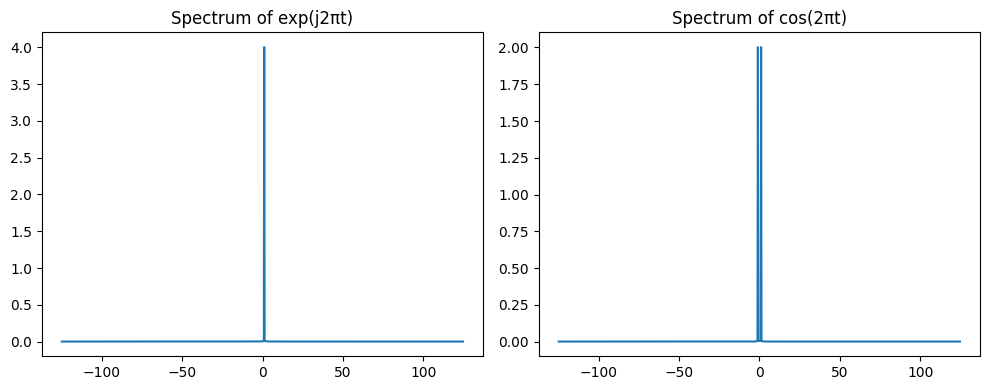

In [3]:
t = np.linspace(-2, 2, 1000)
dt = t[1] - t[0]

x1 = np.exp(1j * 2*np.pi*t)
x2 = np.cos(2*np.pi*t)

X1 = fftshift(fft(x1)) * dt
X2 = fftshift(fft(x2)) * dt
f = fftshift(fftfreq(len(t), dt))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(f, np.abs(X1))
plt.title("Spectrum of exp(j2πt)")

plt.subplot(1, 2, 2)
plt.plot(f, np.abs(X2))
plt.title("Spectrum of cos(2πt)")
plt.tight_layout()
plt.show()


سوال 4:  
سیستم

h[n] = [0, 1, 0.5]

را در نظر بگیرید


تاخیر گروهی آن را با استفاده از مشتق فاز در حوزه فرکانس رسم کنید.


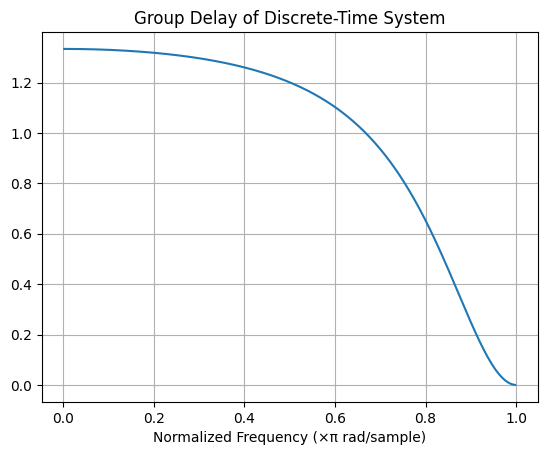

In [4]:
from scipy.signal import freqz

h = [0, 1, 0.5]
w, H = freqz(h)

phase = np.unwrap(np.angle(H))
group_delay = -np.diff(phase) / np.diff(w)

plt.plot(w[1:]/np.pi, group_delay)
plt.title("Group Delay of Discrete-Time System")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.grid(True)
plt.show()


سوال 5:  
تابع

x(t) = sinc(5t)

 را رسم کنید و مکان صفرهای آن را مشخص کنید  
پهنای باند آن را با تقریب از روی نمودار طیف بررسی کنید


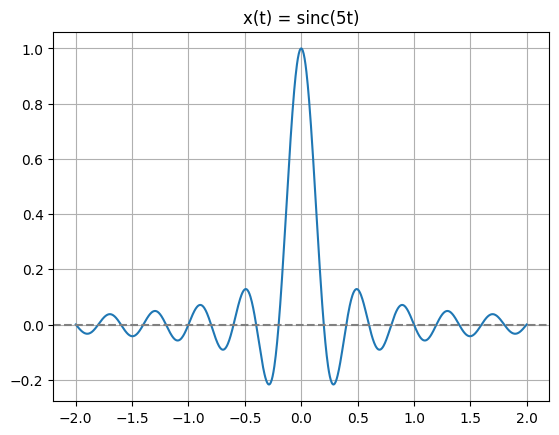

In [5]:
t = np.linspace(-2, 2, 1000)
x = np.sinc(5*t)

plt.plot(t, x)
plt.title("x(t) = sinc(5t)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
